# Pandas - Data Wrangling (LAYG - Learn-As-You-Go)

[Pandas](https://pandas.pydata.org/) is a library for working with and manipulating tabular style data.  In many ways you can think of it as a replacement for a spreadsheet only it's much more powerful.  Whereas [NumPy](https://numpy.org/) provides $N$-dimensional data structures, Pandas is best utilized on two-dimensional, *labeled* data.  The fundamental data structures in Pandas are the `Series` and the `Dataframe`.  

A Pandas Series contains a single column of data and an *index*.  The index is a way to reference the rows of data in the Series.  Common examples of an index would be simply a monotonically increasing set of integers, or time/date stamps for time series data.

A Pandas DataFrame can be thought of being created by combining more than one Series that share a common index.  So a table with multiple column labels and common index would be an example of a DataFrame.  The description of these data structures will be made clear through examples in the sequel.

Similarly to the way we import NumPy, it's idiomatic Python to import Pandas as

```python
import pandas as pd
```

In [1]:
import numpy as np
import pandas as pd

## 1.1 Loading Data 

Pandas offers some of the best utilities available for reading/parsing data from text files. The function [`read_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) has numerous options for managing header/footer lines in files, parsing dates, selecting specific columns, etc in comma separated value (CSV) files.  The default index for the Dataframe is set to a set of monotonically increasing integers unless otherwise specified with the keyword argument `index_col`.

There are similar functions for reading Microsoft Excel spreadsheets ([`read_excel`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)) and fixed width formatted text  ([`read_fwf`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_fwf.html#pandas.read_fwf)).

Let's load the file that we used on last week's exercises: `cars.csv`

The [`head()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) member function for DataFrames displays the first 5 rows of the DataFrame.  Optionally, you can specify an argument (e.g. `head(n=10)` to display more/less rows

In [55]:
df = pd.read_csv('cars.csv', sep = ';') 
df.head() # se esta tudo dentro dos conformes

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


## 1.2 Summary Statistics

The DataFrame member function [`describe`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) provides useful summary statistics such as the total number of samples, mean, standard deviations, min/max, and quartiles for each column of the DataFrame. 

In [3]:
stats = df.describe().transpose()
stats

,count,mean,std,min,25%,50%,75%,max
MPG,406.0,23.051232,8.401777,0.0,17.0,22.35,29.000,46.6
Cylinders,406.0,5.475369,1.712160,3.0,4.0,4.00,8.000,8.0
Displacement,406.0,194.779557,104.922458,68.0,105.0,151.00,302.000,455.0
Horsepower,406.0,103.529557,40.520659,0.0,75.0,93.50,129.000,230.0
Weight,406.0,2979.413793,847.004328,1613.0,2226.5,2822.50,3618.250,5140.0
Acceleration,406.0,15.519704,2.803359,8.0,13.7,15.50,17.175,24.8
Model,406.0,75.921182,3.748737,70.0,73.0,76.00,79.000,82.0


## 2. Indexing and Selecting Data

We can access parts of the DataFrame by their labels or their numerical indices. The most basic and useful operation is to select an entire column of data by it's label.

In [4]:
# method 1
#uma = pd.DataFrame(df['Horsepower'])
#uma.head()
# method 2
other = df[['Horsepower']]
other.head()

,Horsepower
0,130.0
1,165.0
2,150.0
3,150.0
4,140.0


Multiple columns can be selected by passing in a list of labels.

In [5]:
df[['Horsepower', 'MPG']].head()

,Horsepower,MPG
0,130.0,18.0
1,165.0,15.0
2,150.0,18.0
3,150.0,16.0
4,140.0,17.0


### 2.1 Label-based selection (Key-based filter)

The member function [`loc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) can be used to select both rows and columns of data by their labels.  The index is interpreted as the row label.

In [6]:
will_save_to_a_file = df.loc[1:4, ['Horsepower', 'MPG']]
#will_save_to_a_file.to_csv('example.csv', sep=',', index=False)
will_save_to_a_file

,Horsepower,MPG
1,165.0,15.0
2,150.0,18.0
3,150.0,16.0
4,140.0,17.0


An explanation of the notation used in the operation above: the comma (`,`) separates dimensions of the array in the indexing operation.  You can also use the colon (`:`) to represent *all* of that dimension.  The values `1` and `3` are the min and max boundaries, or starting and ending index. So is this operation, the colon signifies getting all *rows*, i.e. the $0^\mbox{th}$ dimension of the array.  Along the second dimension, i.e. the columns, the list of labels represent the columns that we want to show.

`loc` support NumPy-style *slicing* notation to select sequences of labels, where the first element is the starting column, and the second element is the ending column, inclusivé. They are also separeted by the colon (`:`) symbol.

In [7]:
df.loc[1:3, 'Car':'Horsepower']

,Car,MPG,Cylinders,Displacement,Horsepower
1,Buick Skylark 320,15.0,8,350.0,165.0
2,Plymouth Satellite,18.0,8,318.0,150.0
3,AMC Rebel SST,16.0,8,304.0,150.0


### 2.2 Index-based selection

The member function [`iloc`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iloc.html) can be used to select both rows and columns of data by their integer index.  `iloc` supports Python-list style slicing.

It is a purely integer-position based indexing for selection by position (from 0 to length-1 of the axis), but may also be used with a boolean array.

Allowed inputs are:

* An integer, e.g. 5.
* List or array of integers, e.g. [4, 3, 0].
* Slice object with ints, e.g. 1:7.
* A boolean array.

A callable function with one argument (the calling Series, DataFrame or Panel) and that returns valid output for indexing (one of the above). This is useful in method chains, when you don’t have a reference to the calling object, but would like to base your selection on some value.

In [8]:
df.iloc[1:3]

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US


In [9]:
df.iloc[1:4, [1,2]]

,MPG,Cylinders
1,15.0,8
2,18.0,8
3,16.0,8


In [40]:
# Boolean Indexing
cars_with_190_200_HP_filter = df['Horsepower'].isin([180,200])
cars_with_190_200_HP = df[cars_with_190_200_HP_filter]

cars_with_190_200_HP
another_df = cars_with_190_200_HP.reset_index(drop=True)
another_df

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevy C20,10.0,8,307.0,200.0,4376.0,15.0,70,US
1,Dodge Monaco (sw),12.0,8,383.0,180.0,4955.0,11.5,71,US
2,Oldsmobile Vista Cruiser,12.0,8,350.0,180.0,4499.0,12.5,73,US
3,Oldsmobile Omega,11.0,8,350.0,180.0,3664.0,11.0,73,US
4,Cadillac Seville,16.5,8,350.0,180.0,4380.0,12.1,76,US
5,Pontiac Grand Prix LJ,16.0,8,400.0,180.0,4220.0,11.1,77,US


In [42]:
# Boolean Indexing
cars_with_3_cylinders_filter = df['Cylinders'] == 3
cars_with_3_cylinders_filter

0      False
1      False
2      False
3      False
4      False
       ...  
401    False
402    False
403    False
404    False
405    False
Name: Cylinders, Length: 406, dtype: bool

In [43]:
# use the filter from the cell above to return a dataframe that only contains Cylinders = 3
df[cars_with_3_cylinders]

# or
#df[df['Cylinders']==3]

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
78,Mazda RX2 Coupe,19.0,3,70.0,97.0,2330.0,13.5,72,Japan
118,Mazda RX3,18.0,3,70.0,90.0,2124.0,13.5,73,Japan
250,Mazda RX-4,21.5,3,80.0,110.0,2720.0,13.5,77,Japan
341,Mazda RX-7 GS,23.7,3,70.0,100.0,2420.0,12.5,80,Japan


In [44]:
weight = df['Weight'] < 1700
weight

0      False
1      False
2      False
3      False
4      False
       ...  
401    False
402    False
403    False
404    False
405    False
Name: Weight, Length: 406, dtype: bool

In [45]:
df[weight]

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
61,Datsun 1200,35.0,4,72.0,69.0,1613.0,18.0,71,Japan
151,Toyota Corolla,31.0,4,76.0,52.0,1649.0,16.5,74,Japan


### 2.3 Get data as NumPy array 

We can get the underlying data in a Series/DataFrame as a NumPy array with the `values` attribute.

In [46]:
df['Car'].values

array(['Chevrolet Chevelle Malibu', 'Buick Skylark 320',
       'Plymouth Satellite', 'AMC Rebel SST', 'Ford Torino',
       'Ford Galaxie 500', 'Chevrolet Impala', 'Plymouth Fury iii',
       'Pontiac Catalina', 'AMC Ambassador DPL', 'Citroen DS-21 Pallas',
       'Chevrolet Chevelle Concours (sw)', 'Ford Torino (sw)',
       'Plymouth Satellite (sw)', 'AMC Rebel SST (sw)',
       'Dodge Challenger SE', "Plymouth 'Cuda 340",
       'Ford Mustang Boss 302', 'Chevrolet Monte Carlo',
       'Buick Estate Wagon (sw)', 'Toyota Corolla Mark ii',
       'Plymouth Duster', 'AMC Hornet', 'Ford Maverick', 'Datsun PL510',
       'Volkswagen 1131 Deluxe Sedan', 'Peugeot 504', 'Audi 100 LS',
       'Saab 99e', 'BMW 2002', 'AMC Gremlin', 'Ford F250', 'Chevy C20',
       'Dodge D200', 'Hi 1200D', 'Datsun PL510', 'Chevrolet Vega 2300',
       'Toyota Corolla', 'Ford Pinto', 'Volkswagen Super Beetle 117',
       'AMC Gremlin', 'Plymouth Satellite Custom',
       'Chevrolet Chevelle Malibu', 'Ford Tori

## 3. DataFrame Transformations

There are several member functions that allow for transformations of the DataFrame labels, adding/removing columns, etc.

To rename DataFrame column labels, we pass a Python dictionary where the keywords are the current labels and the values are the new labels.  For example,

The use of the keyword argument `inplace = True` has an equivalent outcome as writing

```python
df = df.rename(...
```

In [57]:
df.rename(columns={'MPG': 'Miles per Gallon', 
                   'Horsepower': 'HP', 
                   'Car': 'Maker'}, inplace=True)
df.head()

,Maker,Miles per Gallon,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


### 3.1 Adding a New Column

Pandas DataFrames share a lot of the same syntax with Python dictionaries including accessing columns by label (i.e. keyword) and adding entries.  The example below shows how to add a new column with the label `'zero'`.

In [65]:
df['zero'] = '0'
df.head()

,Maker,Miles per Gallon,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin,zero
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US,0
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US,0
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US,0
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US,0
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US,0


### 3.2 Removing Columns 

We can remove unwanted columns with the [`drop`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html) member function. The argument `inplace = True` modifies the existing DataFrame in place in memory, i.e. `'zero'` will no longer be accessible in any way in the DataFrame.

The argument `axis = 1` refers to columns, the default is `axis = 0` in which case the positional argument would be expected to be an index / row label.

In [67]:
df.drop('zero', axis=1, inplace=False)
df.head()

,Maker,Miles per Gallon,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


### 3.3 Removing Rows

We can remove the row indexed by `1` as follows.

Notice we can stack member function commands, i.e. the `drop` function is immediately followed by `head` to display the DataFrame with row index `1` removed.

In [70]:
df.drop(1).head()

,Maker,Miles per Gallon,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US
5,Ford Galaxie 500,15.0,8,429.0,198.0,4341.0,10.0,70,US


Because the argument `inplace = True` was not given, the orginal DataFrame is unchanged.  

In [71]:
df.head()

,Maker,Miles per Gallon,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8,307.0,130.0,3504.0,12.0,70,US
1,Buick Skylark 320,15.0,8,350.0,165.0,3693.0,11.5,70,US
2,Plymouth Satellite,18.0,8,318.0,150.0,3436.0,11.0,70,US
3,AMC Rebel SST,16.0,8,304.0,150.0,3433.0,12.0,70,US
4,Ford Torino,17.0,8,302.0,140.0,3449.0,10.5,70,US


### 3.4 Sorting

We can sort the DataFrame in either ascending or descending order by any column label.

In [72]:
df.sort_values('Miles per Gallon', ascending=False, inplace=True)
df.head()

,Maker,Miles per Gallon,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin
329,Mazda GLC,46.6,4,86.0,65.0,2110.0,17.9,80,Japan
336,Honda Civic 1500 gl,44.6,4,91.0,67.0,1850.0,13.8,80,Japan
332,Volkswagen Rabbit C (Diesel),44.3,4,90.0,48.0,2085.0,21.7,80,Europe
402,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
333,Volkswagen Dasher (diesel),43.4,4,90.0,48.0,2335.0,23.7,80,Europe


### 3.5 Reseting Indices

In the previous example, the resulting indices are now out of order after the sorting operation.  This can be fixed, if desired, with the [`reset_index`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) member function.

The reindexing operation could have been accomplished during the sort operation by passing the argument `ingnore_index = True`.

In [73]:
df.reset_index(inplace=True, drop=True)
df.head()

,Maker,Miles per Gallon,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin
0,Mazda GLC,46.6,4,86.0,65.0,2110.0,17.9,80,Japan
1,Honda Civic 1500 gl,44.6,4,91.0,67.0,1850.0,13.8,80,Japan
2,Volkswagen Rabbit C (Diesel),44.3,4,90.0,48.0,2085.0,21.7,80,Europe
3,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
4,Volkswagen Dasher (diesel),43.4,4,90.0,48.0,2335.0,23.7,80,Europe


## 4. Feature Engineering 

In the field of data science, DataFrame column labels are often referred to as *features*.  *Feature engineering* is the process of creating new features and/or transforming features for further analysis.  In the example below, we create two new features through manipulations of existing features.

Mathematical operations can be performed directly on the DataFrame columns that are accessed by their labels.

In [74]:
df['L/100km'] =  235.2137783 / df['Miles per Gallon']
df['kW'] = df['HP'] * 0.745699872
df.head()

,Maker,Miles per Gallon,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin,L/100km,kW
0,Mazda GLC,46.6,4,86.0,65.0,2110.0,17.9,80,Japan,5.047506,48.470492
1,Honda Civic 1500 gl,44.6,4,91.0,67.0,1850.0,13.8,80,Japan,5.273852,49.961891
2,Volkswagen Rabbit C (Diesel),44.3,4,90.0,48.0,2085.0,21.7,80,Europe,5.309566,35.793594
3,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe,5.345768,38.776393
4,Volkswagen Dasher (diesel),43.4,4,90.0,48.0,2335.0,23.7,80,Europe,5.419672,35.793594


### 4.1 Assigning Conditional Categories

We can also use conditional statements when assigning values to a new feature.  For example, we could have a categorical fuel consumption measure, economic and expensive, called `'Fuel Consumption Type'`.

Most NumPy functions such as [`where`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html) will work directly on Pandas DataFrame columns.

In [80]:
df['Fuel Consumption Type'] = np.where(df['L/100km'] > 6, 'Expensive', 'Economic')
carros_economicos_filter = df['Fuel Consumption Type'] == 'Economic'
df[carros_economicos_filter]

,Maker,Miles per Gallon,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin,L/100km,kW,Fuel Consumption Type
0,Mazda GLC,46.6,4,86.0,65.0,2110.0,17.9,80,Japan,5.047506,48.470492,Economic
1,Honda Civic 1500 gl,44.6,4,91.0,67.0,1850.0,13.8,80,Japan,5.273852,49.961891,Economic
2,Volkswagen Rabbit C (Diesel),44.3,4,90.0,48.0,2085.0,21.7,80,Europe,5.309566,35.793594,Economic
3,Volkswagen Pickup,44.0,4,97.0,52.0,2130.0,24.6,82,Europe,5.345768,38.776393,Economic
4,Volkswagen Dasher (diesel),43.4,4,90.0,48.0,2335.0,23.7,80,Europe,5.419672,35.793594,Economic
5,Volkswagen Rabbit Custom Diesel,43.1,4,90.0,48.0,1985.0,21.5,78,Europe,5.457396,35.793594,Economic
6,Volkswagen Rabbit,41.5,4,98.0,76.0,2144.0,14.7,80,Europe,5.667802,56.673190,Economic
7,Renault Lecar Deluxe,40.9,4,85.0,0.0,1835.0,17.3,80,Europe,5.750948,0.000000,Economic
8,Datsun 210,40.8,4,85.0,65.0,2110.0,19.2,80,Japan,5.765044,48.470492,Economic
9,Datsun B210 GX,39.4,4,85.0,70.0,2070.0,18.6,78,Japan,5.969893,52.198991,Economic


In [81]:
expensive_cars = df['Fuel Consumption Type'] == 'Expensive'
expensive_cars_sorted_descending = df[expensive_cars].sort_values('L/100km', ascending=False, inplace=False)
expensive_cars_sorted_descending.head()

,Maker,Miles per Gallon,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin,L/100km,kW,Fuel Consumption Type
405,AMC Rebel SST (sw),0.0,8,360.0,175.0,3850.0,11.0,70,US,inf,130.497478,Expensive
404,Volkswagen Super Beetle 117,0.0,4,97.0,48.0,1978.0,20.0,71,Europe,inf,35.793594,Expensive
403,Saab 900s,0.0,4,121.0,110.0,2800.0,15.4,81,Europe,inf,82.026986,Expensive
402,Ford Mustang Boss 302,0.0,8,302.0,140.0,3353.0,8.0,70,US,inf,104.397982,Expensive
401,Plymouth Satellite (sw),0.0,8,383.0,175.0,4166.0,10.5,70,US,inf,130.497478,Expensive


### 4.2 Missing Features

Data are always messy and often have lots of missing values. There are many different ways, in which missing data might present `NaN`, `None`, or `NA`. Sometimes researchers code missing values with specific numeric codes such as `999999`. It is important to find these as they can screw up your analyses if they are hiding in your data.

If the missing values are using a standard pandas or numpy value such as `NaN`, `None`, or `NA`, we can identify where the missing values are as booleans using the `isnull()` method.

Fortunately, Pandas offers several built in methods to identify and deal with missing Data.  

First, let's create a missing data point in the `Cylinders` and in `HP` column of `df`.

The [`at`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html#pandas.DataFrame.at) member function allows for fast selection of a single row/label position within a Series/DataFrame.

In [82]:
df.at[1, 'Cylinders'] = None 
df.at[2, 'HP'] = None
df.head(4)

,Maker,Miles per Gallon,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin,L/100km,kW,Fuel Consumption Type
0,Mazda GLC,46.6,4.0,86.0,65.0,2110.0,17.9,80,Japan,5.047506,48.470492,Economic
1,Honda Civic 1500 gl,44.6,NaN,91.0,67.0,1850.0,13.8,80,Japan,5.273852,49.961891,Economic
2,Volkswagen Rabbit C (Diesel),44.3,4.0,90.0,NaN,2085.0,21.7,80,Europe,5.309566,35.793594,Economic
3,Volkswagen Pickup,44.0,4.0,97.0,52.0,2130.0,24.6,82,Europe,5.345768,38.776393,Economic


The [`isnull`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.isnull.html) member function returns a boolean array that identifies rows with missing values.

Suppose we wanted to count the number of missing values for each column in the dataset.

One thing that is nice about Python is that you can chain commands, which means that the output of one method can be the input into the next method. This allows us to write intuitive and concise code. Notice how we take the `sum()` of all of the null cases. We can chain the `.null()` and `.sum()` methods to see how many null values are added up in each column.

In [83]:
df.isnull().sum()

Maker                    0
Miles per Gallon         0
Cylinders                1
Displacement             0
HP                       1
Weight                   0
Acceleration             0
Model                    0
Origin                   0
L/100km                  0
kW                       0
Fuel Consumption Type    0
dtype: int64

You can use the boolean indexing once again to see the datapoints that have missing values. We chained the method `.any()` which will check if there are any `True` values for a given axis. `axis=0` indicates rows, while `axis=1` indicates columns. So here we are creating a boolean index for row where any column has a missing value.

In [87]:
df[df.isnull().any(axis=1)]
df.shape

(406, 12)

### 4.3 Dropping missing rows

The [`dropna`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html) member function allows us to remove missing rows from the DataFrame.

In [88]:
df.dropna(inplace=True)
df.head()

,Maker,Miles per Gallon,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin,L/100km,kW,Fuel Consumption Type
0,Mazda GLC,46.6,4.0,86.0,65.0,2110.0,17.9,80,Japan,5.047506,48.470492,Economic
3,Volkswagen Pickup,44.0,4.0,97.0,52.0,2130.0,24.6,82,Europe,5.345768,38.776393,Economic
4,Volkswagen Dasher (diesel),43.4,4.0,90.0,48.0,2335.0,23.7,80,Europe,5.419672,35.793594,Economic
5,Volkswagen Rabbit Custom Diesel,43.1,4.0,90.0,48.0,1985.0,21.5,78,Europe,5.457396,35.793594,Economic
6,Volkswagen Rabbit,41.5,4.0,98.0,76.0,2144.0,14.7,80,Europe,5.667802,56.673190,Economic


## 5. Creating New DataFrames

Up to now, we've utilized a DataFrame that was created by reading in the data from a CSV file.  We can also create DataFrames from scratch.  First we'll create a couple of NumPy arrays with representative data for demonstration.

In [89]:
HP = np.random.randint(low = 100, high = 200)
Fuel_Consumption = np.random.randint(low = 5, high = 12)
print('HP:', HP, 'Fuel Consumption:', Fuel_Consumption)

HP: 181 Fuel Consumption: 8


Create a Python dictionary where the keywords are the desired DataFrame labels and the values are the associated data.

In [90]:
df_dict = {'Horsepower': HP, 'Fuel Consumption': Fuel_Consumption}
df_dict

{'Horsepower': 181, 'Fuel Consumption': 8}

Pass the dictionary as an argument to `pd.Dataframe` to create the DataFrame

In [91]:
df_new = pd.DataFrame(df_dict, index=['A']) # required for indexing
df_new.head()

,Horsepower,Fuel Consumption
A,181,8


## 6. Merging DataFrames

### 6.1 Concatenation

In this example, we'll take a couple subsets from our original DataFrame and create a new one by joining them with the [`concat`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) function.

In [92]:
df1 = df.iloc[:3,:5]; 
df1

,Maker,Miles per Gallon,Cylinders,Displacement,HP
0,Mazda GLC,46.6,4.0,86.0,65.0
3,Volkswagen Pickup,44.0,4.0,97.0,52.0
4,Volkswagen Dasher (diesel),43.4,4.0,90.0,48.0


In [93]:
df2 = df.iloc[10:13,:5]; 
df2

,Maker,Miles per Gallon,Cylinders,Displacement,HP
12,Toyota Corolla Tercel,38.1,4.0,89.0,60.0
13,Datsun 310 GX,38.0,4.0,91.0,67.0
14,Honda Civic,38.0,4.0,91.0,67.0


We could have reindexed with the `ingnore_index = True` keyword argument.

In [97]:
df3 = pd.concat([df1, df2], axis=0, ignore_index=True)
df3

,Maker,Miles per Gallon,Cylinders,Displacement,HP
0,Mazda GLC,46.6,4.0,86.0,65.0
1,Volkswagen Pickup,44.0,4.0,97.0,52.0
2,Volkswagen Dasher (diesel),43.4,4.0,90.0,48.0
3,Toyota Corolla Tercel,38.1,4.0,89.0,60.0
4,Datsun 310 GX,38.0,4.0,91.0,67.0
5,Honda Civic,38.0,4.0,91.0,67.0


### 6.2 Concat / Append (deprecated)

We can also combine datasets by appending new data to the end of a dataframe.

Suppose we want to append a new data entry of an additional participant onto the df4 dataframe. Notice that we need to specify to `ignore_index=True` and also that we need to assign the new dataframe back to a variable. This operation is not done in place.

In [98]:
new_data = pd.Series({'Maker':'Tesla', 'Miles per Gallon':0.0, 'Cylinders':0.0, 'Displacement':46, 'HP': 500})
#df4 = df3.append(new_data, ignore_index=True) # DEPRECATED
df4 = pd.concat([df3, new_data.to_frame().T], ignore_index=True)
df4.tail()

,Maker,Miles per Gallon,Cylinders,Displacement,HP
2,Volkswagen Dasher (diesel),43.4,4.0,90.0,48.0
3,Toyota Corolla Tercel,38.1,4.0,89.0,60.0
4,Datsun 310 GX,38.0,4.0,91.0,67.0
5,Honda Civic,38.0,4.0,91.0,67.0
6,Tesla,0.0,0.0,46,500


## 7. Plotting DataFrames

Pandas has some built in automatic plotting methods for DataFrames. They are most useful for quick-look plots of relationships between DataFrame columns, but they can be fully customized to make publication quality plots with additional options available in the [Matplotlib](https://matplotlib.org/) plotting library.  The default [`plot`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html) member function will create a line plot of all DataFrame labels as functions of the index.

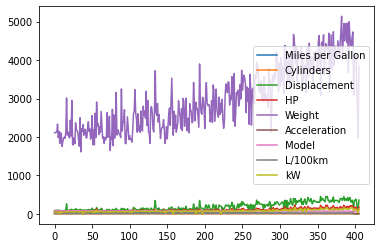

In [99]:
df.plot();

Of course, this is not that useful a plot.  What we are likely looking for is a relationship between the DataFrame columns.  One way to visualize this is to set the desired abscissa as the DataFrame index and create a plot. 

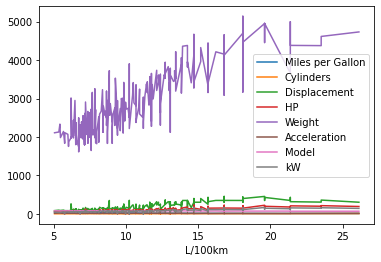

In [100]:
df.set_index(['L/100km']).plot();

Or explicitly pass the desired independent variable to the `x` keyword arguments and the dependent variable to the `y` keyword argument.  This time we'll also explicitly create a scatter plot.

When the DataFrame columns are explicitly passed as arguments, the axis labels are correctly populated.

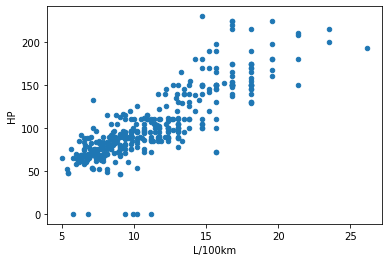

In [101]:
df.plot.scatter(x='L/100km', y='HP');

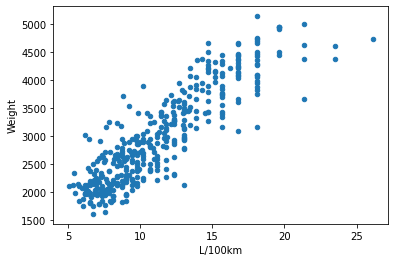

In [102]:
df.plot.scatter(x='L/100km', y='Weight');

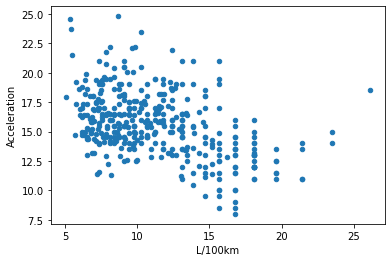

In [103]:
df.plot.scatter(x='L/100km', y='Acceleration');

## 8. Writing a DataFrame to a File

The most common way way to store and share DataFrames among different computers is the export the DataFrame to a CSV file.  This is accomplished with the [`to_csv`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) member function.

In [104]:
df.to_csv("cars_new.csv", index=False)
df.head()

,Maker,Miles per Gallon,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin,L/100km,kW,Fuel Consumption Type
0,Mazda GLC,46.6,4.0,86.0,65.0,2110.0,17.9,80,Japan,5.047506,48.470492,Economic
3,Volkswagen Pickup,44.0,4.0,97.0,52.0,2130.0,24.6,82,Europe,5.345768,38.776393,Economic
4,Volkswagen Dasher (diesel),43.4,4.0,90.0,48.0,2335.0,23.7,80,Europe,5.419672,35.793594,Economic
5,Volkswagen Rabbit Custom Diesel,43.1,4.0,90.0,48.0,1985.0,21.5,78,Europe,5.457396,35.793594,Economic
6,Volkswagen Rabbit,41.5,4.0,98.0,76.0,2144.0,14.7,80,Europe,5.667802,56.673190,Economic


In [105]:
df_new = pd.read_csv("cars_new.csv")
df_new.head()

,Maker,Miles per Gallon,Cylinders,Displacement,HP,Weight,Acceleration,Model,Origin,L/100km,kW,Fuel Consumption Type
0,Mazda GLC,46.6,4.0,86.0,65.0,2110.0,17.9,80,Japan,5.047506,48.470492,Economic
1,Volkswagen Pickup,44.0,4.0,97.0,52.0,2130.0,24.6,82,Europe,5.345768,38.776393,Economic
2,Volkswagen Dasher (diesel),43.4,4.0,90.0,48.0,2335.0,23.7,80,Europe,5.419672,35.793594,Economic
3,Volkswagen Rabbit Custom Diesel,43.1,4.0,90.0,48.0,1985.0,21.5,78,Europe,5.457396,35.793594,Economic
4,Volkswagen Rabbit,41.5,4.0,98.0,76.0,2144.0,14.7,80,Europe,5.667802,56.673190,Economic
